# Return and Volatility

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Tickers of the firm
# AAPL: Apple
# BA: Boeing
# KO: Coca-Cola
# IBM: IBM
# DIS: Disney
# MSFT: Microsoft
tickers = ['AAPL', 'BA', 'KO', 'IBM', 'DIS', 'MSFT']

In [3]:
stocks = yf.download(tickers, start='2015-01-01')['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [4]:
stocks

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,24.435270,113.657211,87.092400,103.354820,31.347847,40.378071
2015-01-05,23.746889,112.870064,85.819702,101.728539,31.347847,40.006760
2015-01-06,23.749121,111.540634,85.364502,99.534683,31.585876,39.419571
2015-01-07,24.082138,113.272385,86.237747,98.884132,31.980158,39.920414
2015-01-08,25.007429,115.275284,87.129585,101.033379,32.366978,41.094795
...,...,...,...,...,...,...
2024-04-04,168.820007,183.289993,117.089996,187.940002,59.299999,417.880005
2024-04-05,169.580002,183.139999,118.379997,189.139999,59.509998,425.519989
2024-04-08,168.449997,181.559998,117.349998,189.820007,59.270000,424.589996


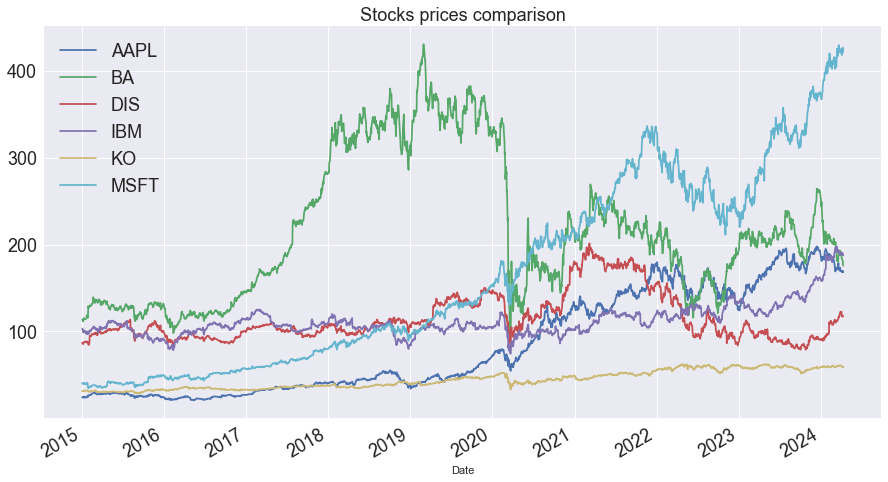

In [5]:
stocks.plot(figsize=(15,8), fontsize=18)
plt.legend(fontsize=18)
plt.title('Stocks prices comparison', fontsize=18)
plt.show()

Looking at the plot we can think that Coca-Cola ('KO', the yellow line) is almost no-varying compared to the others stock. The reality is that we're looking at the price of the sigle stocks, and they can differ a lot. Thus, in order to have an equal comparison, we must rescale the values. We do it by dividing the stocks values with their value at time 0:

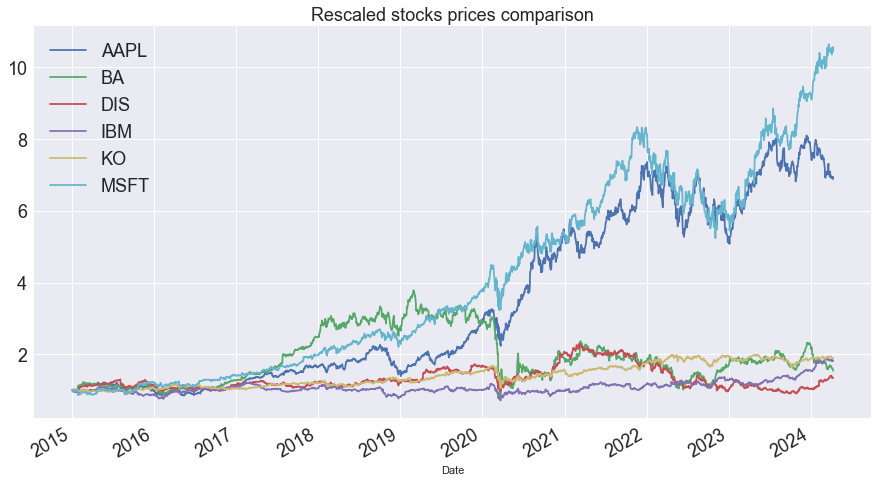

In [6]:
initial_values = stocks.iloc[0,:]
(stocks/initial_values).plot(figsize=(15,8), fontsize=18)
plt.legend(fontsize=18)
plt.title('Rescaled stocks prices comparison', fontsize=18)
plt.show()

Looking at the normalized prices, we can see that Microsot and Apple are the best performing one.

# Returns

We can compute the returns now. We can compute two kinds of returns:

### Simple Returns
Is computed as the price of today minus the price of yesterday, all divided by the price of yesterday.

$SR_t = \frac{PRICE_t - PRICE_{t-1}}{PRICE_{t-1}}$

How to compute that using Python? In order to have to the same row the price of today and the price of yesterday, we can use the method *shift(n)*. It will shift the rows *n* times. So, to have the price of yesterday we can do:

In [7]:
# Look at the first 3 values
stocks.head(3)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,24.435270,113.657211,87.092400,103.354820,31.347847,40.378071
2015-01-05,23.746889,112.870064,85.819702,101.728539,31.347847,40.006760
2015-01-06,23.749121,111.540634,85.364502,99.534683,31.585876,39.419571


In [8]:
# Now we shift the values
stocks.shift(1).head(3)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,24.435270,113.657211,87.092400,103.354820,31.347847,40.378071
2015-01-06,23.746889,112.870064,85.819702,101.728539,31.347847,40.006760


We can see that with *shift(1)* the first row is now the second one, the second one the third one and so on. Doing so, for the new first row, we don't have any previous value and for this reason we have all Nan.

We can introduce also the method *diff()* that compute the difference between two periods. If we want to compute the difference of the price at time $t$ and $t-1$ we simply need to write:

In [9]:
stocks.diff(periods=1)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.688381,-0.787148,-1.272697,-1.626282,0.000000,-0.371311
2015-01-06,0.002232,-1.329430,-0.455200,-2.193855,0.238029,-0.587189
2015-01-07,0.333017,1.731750,0.873245,-0.650551,0.394281,0.500843
2015-01-08,0.925291,2.002899,0.891838,2.149246,0.386820,1.174381
...,...,...,...,...,...,...
2024-04-04,-0.829987,-1.630005,-1.890007,-2.959991,-0.530003,-2.570007
2024-04-05,0.759995,-0.149994,1.290001,1.199997,0.209999,7.639984
2024-04-08,-1.130005,-1.580002,-1.029999,0.680008,-0.239998,-0.929993


Now that we know how to compute the differece of prices and how to get the price of the previous day, we can compute the simple return as:

In [10]:
SR = stocks.diff(periods=1)/stocks.shift(1)
SR.head(5)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.006926,-0.014613,-0.015735,0.000000,-0.009196
2015-01-06,0.000094,-0.011778,-0.005304,-0.021566,0.007593,-0.014677
2015-01-07,0.014022,0.015526,0.010230,-0.006536,0.012483,0.012705
2015-01-08,0.038422,0.017682,0.010342,0.021735,0.012096,0.029418


That is the same as writing:

In [11]:
SR = (stocks-stocks.shift(1))/stocks.shift(1)
SR.head(5)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.006926,-0.014613,-0.015735,0.000000,-0.009196
2015-01-06,0.000094,-0.011778,-0.005304,-0.021566,0.007593,-0.014677
2015-01-07,0.014022,0.015526,0.010230,-0.006536,0.012483,0.012705
2015-01-08,0.038422,0.017682,0.010342,0.021735,0.012096,0.029418


There is a third way, that is using a method that compute the percentage of price change between periods:

In [12]:
SR = stocks.pct_change(periods=1)
SR.head(5)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.006926,-0.014613,-0.015735,0.000000,-0.009196
2015-01-06,0.000094,-0.011778,-0.005304,-0.021566,0.007593,-0.014677
2015-01-07,0.014022,0.015526,0.010230,-0.006536,0.012483,0.012705
2015-01-08,0.038422,0.017682,0.010342,0.021735,0.012096,0.029418


The value we see is the daily change of prices value. If we want to see the montly variation, we can resample the last value of each month and then apply the same formula as before:

In [13]:
stocks.resample('BM').last().pct_change(periods=1).head(5)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-27,0.100777,0.044115,0.144239,0.063701,0.051736,0.093120
2015-03-31,-0.031372,-0.005105,0.007782,-0.008892,-0.055739,-0.072748
2015-04-30,0.005786,-0.044909,0.036514,0.067227,0.000247,0.196262
2015-05-29,0.045339,-0.013391,0.015177,-0.002078,0.009862,-0.030334


And we can to the same with the annual returns:

In [14]:
stocks.resample('Y').last().pct_change(periods=1)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.124804,0.113088,0.006719,0.252109,-0.003571,0.150777
2017-12-31,0.484643,0.947151,0.047602,-0.039878,0.143821,0.407306
2018-12-31,-0.053902,0.115016,0.036078,-0.225580,0.067735,0.207953
2019-12-31,0.889578,0.033382,0.335135,0.235761,0.205994,0.575580
2020-12-31,0.823068,-0.338981,0.252714,-0.011626,0.024691,0.425341
2021-12-31,0.346482,-0.059516,-0.145104,0.166528,0.113725,0.524769
2022-12-31,-0.264042,-0.053795,-0.439086,0.106370,0.106096,-0.280248
2023-12-31,0.490081,0.368366,0.042637,0.218488,-0.044345,0.581913


### Log Returns
The logaritmic returns are defined as:

$ LR = log(\frac{PRICE_t}{PRICE_{t-1}})$

that is:

$ LR = log(PRICE_t)-log(PRICE_{t-1})$

In [15]:
np.log(stocks) - np.log(stocks.shift(1))

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.006950,-0.014721,-0.015860,0.000000,-0.009238
2015-01-06,0.000094,-0.011848,-0.005318,-0.021802,0.007564,-0.014786
2015-01-07,0.013925,0.015406,0.010178,-0.006557,0.012406,0.012625
2015-01-08,0.037703,0.017528,0.010289,0.021502,0.012023,0.028994
...,...,...,...,...,...,...
2024-04-04,-0.004904,-0.008854,-0.016013,-0.015627,-0.008898,-0.006131
2024-04-05,0.004492,-0.000819,0.010957,0.006365,0.003535,0.018118
2024-04-08,-0.006686,-0.008665,-0.008739,0.003589,-0.004041,-0.002188


We can notice that for small variation of price (with daily returns) the SR and LR are not very different. But if we look at the annual returns where the price variation is greater, there is a noticeable difference between SR and LR:

In [16]:
# Annual log returns
np.log(stocks.resample('Y').last()) - np.log(stocks.resample('Y').last().shift(1))

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.117609,0.107138,0.006697,0.224829,-0.003577,0.140438
2017-12-31,0.395174,0.666367,0.046504,-0.040695,0.134374,0.341678
2018-12-31,-0.055409,0.108869,0.035443,-0.255641,0.065539,0.188927
2019-12-31,0.636354,0.032837,0.289032,0.211687,0.187304,0.454624
2020-12-31,0.600521,-0.413973,0.225312,-0.011694,0.024391,0.354411
2021-12-31,0.297495,-0.061361,-0.156776,0.154032,0.107710,0.421843
2022-12-31,-0.306582,-0.055296,-0.578187,0.101084,0.100836,-0.328848
2023-12-31,0.398830,0.313617,0.041753,0.197610,-0.045359,0.458635


Compare these values with the one of the SR annual returns, e.g. compare years 2017, 2019, 2020 of AAPL.

# Average Returns and Volatility
Now we compute the average returns.

In [17]:
# Daily simple return
SR = stocks.pct_change(periods=1)
# Drop rows with null values, e.g. the first row
SR = SR.dropna()

<Axes: xlabel='Date'>

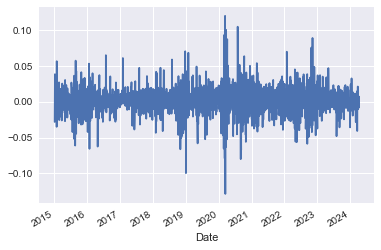

In [18]:
# Take the simple return of Apple
apple = SR.AAPL
apple.plot()

We can see that the daily returns are around the zero value.
We can look at it as an histogram:

<Axes: ylabel='Frequency'>

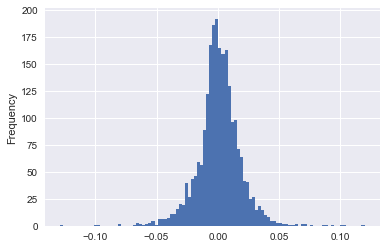

In [19]:
apple.plot(kind='hist', bins=100)

In [20]:
# Daily average return
apple.median(), apple.mean() 

(0.000756279195084586, 0.0009926355483843223)

In [21]:
# Standard deviation -> volatility
# of the daily prices
apple.std()

0.01815499922803047

To compute the **average annual return**, starting from the daily return we must use the formula:

$ AAR = (1 + DAILY\_MEAN)^{250} -1$

where it is raised to the power of 250 because there are 250 tradable days in a year.

In [22]:
AAR = (1 + apple.mean())**250 - 1
AAR

0.2815058129647168

And the **average annual volatility** of the daily prices is computed as:

$ AAV = \sqrt{\sigma^2 \times 250} = \sigma \times \sqrt{250}$

where $\sigma^2$ is the variance of the daily prices. 

In [23]:
AAV_1 = np.sqrt(apple.var()*250)
AAV_2 = apple.std()*np.sqrt(250)
AAV_1, AAV_2

(0.28705574239587467, 0.28705574239587467)

Now we create a dataframe that has the AAR and AAV for each stock, then we visualize the relationship between returns and volatility.

In [24]:
summaryTable = pd.DataFrame({"Return": (1+SR.mean())**250-1,
                             "Volatility": SR.std()*np.sqrt(250)})

summaryTable

,Return,Volatility
AAPL,0.281506,0.287056
BA,0.137992,0.406189
DIS,0.073693,0.280166
IBM,0.096873,0.238508
KO,0.087845,0.180244
MSFT,0.335245,0.274892


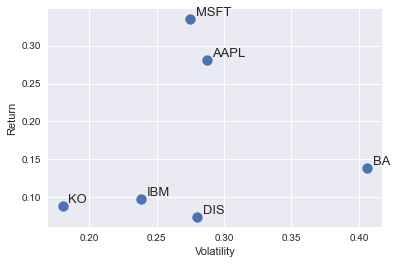

In [25]:
summaryTable.plot.scatter(x="Volatility", y="Return", s=100)
# to have the stocks names close to the points
for idx in summaryTable.index:
    plt.annotate(idx, xy=(summaryTable.loc[idx,"Volatility"]+0.004,
                          summaryTable.loc[idx,"Return"]+0.004),
                 fontsize=13)

This plot shows the so called **efficient frontier**: we want the highiest return with the lowest volatility. Thus, looking at the plot, we want a point that is in the left part of the plot (low volatility) and high in the plot (high return).

So given the data that we have we can see that both Apple and Microsoft (AAPL and MSFT) are always preferred to Boeing (BA), because they are more to the left and high. 
Instead it is not so easy to compare Disney (DIS) and Boeing, because it is true that Disney has lower volatility, but Boing has highier returns.  

# Correlation

We can look at the correlation that is present between the stocks. It is very useful when we want to create a portfolio. Collaration can take value in the inverval (-1,1), where 1 means perfectly correlated and -1 perfectly uncorrelated. A value around 0 means that the stocks are not correlated. When you create a portfolio usually you want to have stocks with low correlation value in order to balace the portfolio.

In [26]:
correlation = SR.corr()
correlation

,AAPL,BA,DIS,IBM,KO,MSFT
AAPL,1.000000,0.407278,0.432077,0.414665,0.382074,0.691939
BA,0.407278,1.000000,0.485584,0.433390,0.415865,0.381275
DIS,0.432077,0.485584,1.000000,0.414126,0.413634,0.455050
IBM,0.414665,0.433390,0.414126,1.000000,0.484386,0.450148
KO,0.382074,0.415865,0.413634,0.484386,1.000000,0.419944
MSFT,0.691939,0.381275,0.455050,0.450148,0.419944,1.000000


The correlation data can be visualized better using a *heatmap*:

<Axes: >

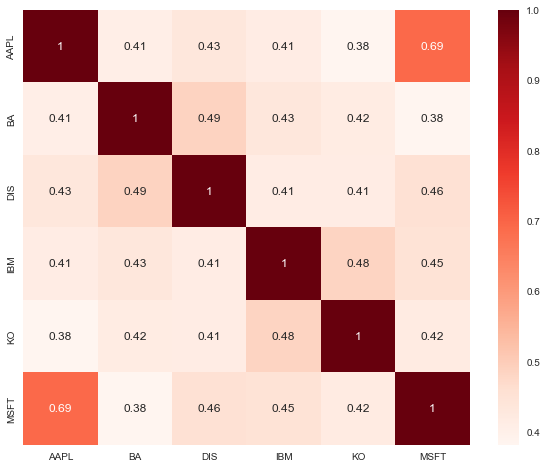

In [35]:
import seaborn
plt.figure(figsize=(10,8))
seaborn.heatmap(correlation, cmap="Reds", annot=True, annot_kws={"size":12})

Darker colors means high correlation.